In [1]:
import pandas as pd
#Google colab does not have pickle
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import seaborn as sns
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D,Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding,  Concatenate, Lambda
from keras.models import Model
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 16.2MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219249 sha256=2d6e97790655e9e13735ad5444df25172ebd5c899be54d3c908df5a7eba72404
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [2]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(6)
print('The data used will be:')
df_train[['Human','Yersinia']]

The data used will be:


,Human,Yersinia
0,"[MKDKQK, KDKQKK, DKQKKK, KQKKKK, QKKKKE, KKKKE...","[MAKASR, AKASRH, KASRHN, ASRHNL, SRHNLS, RHNLS..."
1,"[MSWSGL, SWSGLL, WSGLLH, SGLLHG, GLLHGL, LLHGL...","[MQHVTG, QHVTGS, HVTGSK, VTGSKR, TGSKRR, GSKRR..."
2,"[MSLFDL, SLFDLF, LFDLFR, FDLFRG, DLFRGF, LFRGF...","[MAELPA, AELPAK, ELPAKR, LPAKRR, PAKRRF, AKRRF..."
3,"[MAVAPR, AVAPRL, VAPRLF, APRLFG, PRLFGG, RLFGG...","[MRIFAI, RIFAIS, IFAISC, FAISCS, AISCSS, ISCSS..."
4,"[MSTIQS, STIQSE, TIQSET, IQSETD, QSETDC, SETDC...","[MSYAFP, SYAFPG, YAFPGT, AFPGTF, FPGTFP, PGTFP..."
...,...,...
6265,"[MSYFGE, SYFGEH, YFGEHF, FGEHFW, GEHFWG, EHFWG...","[MITTDG, ITTDGN, TTDGNS, TDGNSA, DGNSAV, GNSAV..."
6266,"[MTVGKS, TVGKSS, VGKSSK, GKSSKM, KSSKML, SSKML...","[MSQPPF, SQPPFW, QPPFWQ, PPFWQQ, PFWQQK, FWQQK..."
6267,"[MNNLSF, NNLSFS, NLSFSE, LSFSEL, SFSELC, FSELC...","[MSEDRH, SEDRHQ, EDRHQQ, DRHQQR, RHQQRQ, HQQRQ..."
6268,"[MAPEIN, APEINL, PEINLP, EINLPG, INLPGP, NLPGP...","[MKNLSF, KNLSFV, NLSFVA, LSFVAG, SFVAGL, FVAGL..."


Median length of Human sequence is 477


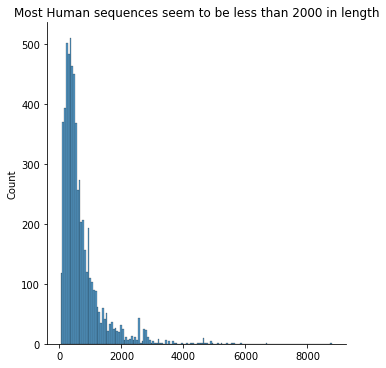

In [ ]:
lengths = sorted(len(s) for s in df_train['Human'])
print("Median length of Human sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Human sequences seem to be less than 2000 in length")

Median length of Yersinia sequence is 334


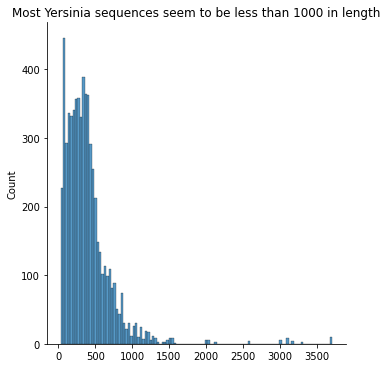

In [ ]:
lengths = sorted(len(s) for s in df_train['Yersinia'])
print("Median length of Yersinia sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Yersinia sequences seem to be less than 1000 in length")

In [3]:
data1_6D_doubleip_pre,data2_6D_doubleip_pre,data1_test_6D_doubleip_pre,data2_test_6D_doubleip_pre,num_words_6D,MAX_SEQUENCE_LENGTH_6D,MAX_VOCAB_SIZE_6D = f.get_seq_data_doubleip(850000,1000,df_train,df_test,pad = 'pre')

MAX_VOCAB_SIZE is 850000
MAX_SEQUENCE_LENGTH is 1000
max sequences1_train length: 5630
min sequences1_train length: 0
median sequences1_train length: 199
max word index sequences1_train: 849999
max sequences2_train length: 3705
min sequences2_train length: 0
median sequences2_train length: 329
max word index sequences2_train: 849999
Found 2438322 unique tokens in tokenizer1.
Found 864366 unique tokens in tokenizer2.
pre padding
Shape of data1 tensor: (6270, 1000)
Shape of data2 tensor: (6270, 1000)
max test_sequences1 length: 5630
min test_sequences1 length: 0
median test_sequences1 length: 70
max test_sequences2 length: 3705
min test_sequences2 length: 0
median test_sequences2 length: 284
pre padding for test seq.
Shape of test_data1 tensor: (1514, 1000)
Shape of test_data2 tensor: (1514, 1000)
num_words is 850000


In [4]:
EMBEDDING_DIM_6D = 15
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 5
DROP=0.7

x1 = f.conv_model(MAX_SEQUENCE_LENGTH_6D,EMBEDDING_DIM_6D,num_words_6D,DROP)
x2 = f.conv_model(MAX_SEQUENCE_LENGTH_6D,EMBEDDING_DIM_6D,num_words_6D,DROP)

concatenator = Concatenate(axis=1)
x = concatenator([x1.output, x2.output])
x = Dense(128)(x)
x = Dropout(DROP)(x)
output = Dense(1, activation="sigmoid",name="Final")(x)
model6D_CNN_doubleip = Model(inputs=[x1.input, x2.input], outputs=output)

model6D_CNN_doubleip.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#plot_model(model6D_CNN_doubleip, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

trains = [data1_6D_doubleip_pre,data2_6D_doubleip_pre]
tests = [data1_test_6D_doubleip_pre,data2_test_6D_doubleip_pre]


model6D_CNN_doubleip.fit(trains, df_train['label'].values, epochs=EPOCHS, batch_size=BATCH_SIZE,validation_data=(tests, df_test['label'].values))
print(roc_auc_score(df_test['label'].values, model6D_CNN_doubleip.predict(tests)))

#asd


Epoch 1/5
49/49 [==============================] - 29s 262ms/step - loss: 0.6153 - accuracy: 0.6423 - val_loss: 0.5027 - val_accuracy: 0.7774
Epoch 2/5
49/49 [==============================] - 12s 250ms/step - loss: 0.4526 - accuracy: 0.7869 - val_loss: 0.4129 - val_accuracy: 0.8263
Epoch 3/5
49/49 [==============================] - 12s 252ms/step - loss: 0.2162 - accuracy: 0.9137 - val_loss: 0.4200 - val_accuracy: 0.8296
Epoch 4/5
49/49 [==============================] - 12s 250ms/step - loss: 0.1267 - accuracy: 0.9538 - val_loss: 0.4392 - val_accuracy: 0.8250
Epoch 5/5
49/49 [==============================] - 12s 250ms/step - loss: 0.0734 - accuracy: 0.9751 - val_loss: 0.4801 - val_accuracy: 0.8223
0.8957183417124889
